In [1]:
from sklearn.datasets import load_files  
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import layers

In [2]:


if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
path = 'C:\\Users\\Machine Learning\\Desktop\\Animal_Data\\raw-img'
data = load_files(path)

In [4]:
data.target_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [5]:
def load_dataset(path):
   data = load_files(path)
   animal_files = np.array(data['filenames'])
   animal_names = np.array(data['target_names'])
   animal_targets = np_utils.to_categorical(np.array(data['target']),10)
   return animal_files, animal_targets, animal_names

In [6]:
animal_files, animal_targets, animal_names = load_dataset(path)

In [7]:
import os
animal_names = []
for i in animal_files:
    animal_names.append(os.path.basename(os.path.dirname(i)))
animal_names = np.array(animal_names)   
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep","ragno": "spider", "scoiattolo": "squirrel"}
animal_names =np.array( [translate[item] for item in animal_names])
animal_names.shape

(26179,)

In [8]:
names_unique = data.target_names
names_unique =np.array( [translate[item] for item in names_unique])
names_unique

array(['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow',
       'sheep', 'spider', 'squirrel'], dtype='<U9')

In [9]:

shuffler = np.random.permutation(animal_files.shape[0])
animal_files = animal_files[shuffler]
animal_targets = animal_targets[shuffler]
animal_names = animal_names[shuffler]

In [10]:
test_size = int(animal_files.shape[0]*0.1)
print('test_size', test_size)
animal_files_test = animal_files[:test_size]
animal_targets_test = animal_targets[:test_size]
animal_names_test = animal_names[:test_size]

animal_files_train = animal_files[test_size:]
animal_targets_train = animal_targets[test_size:]
animal_names_train = animal_names[test_size:]

animal_files_valid = animal_files_train[:test_size]
animal_targets_valid = animal_targets_train[:test_size]
animal_names_valid = animal_names_train[test_size:]

animal_files_train = animal_files_train[test_size:]
animal_targets_train = animal_targets_train[test_size:]
animal_names_train = animal_names_train[test_size:]


test_size 2617


In [11]:
def path_to_tensor(img_path, expand=True):
   # loads RGB image as PIL.Image.Image type
   img = image.load_img(img_path, target_size=(224, 224))
   
   # convert PIL.Image type to 3D tensor with shape (224, 224, 3)
   x = image.img_to_array(img)
   
   # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) 
   if expand:
       return np.expand_dims(x, axis=0)
   else:
       return x

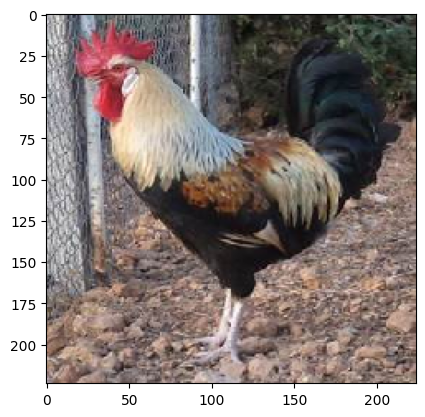

'chicken'

In [12]:
i = 567
plt.imshow(path_to_tensor(animal_files_test[i], expand=False)/255.)
plt.show()
animal_names_test[i]

In [13]:
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [14]:
train_tensors = paths_to_tensor(animal_files_train).astype('float32')/255
valid_tensors = paths_to_tensor(animal_files_valid).astype('float32')/255
test_tensors = paths_to_tensor(animal_files_test).astype('float32')/255

100%|████████████████████████████████████████████████████████████████████████████| 2617/2617 [00:02<00:00, 1052.16it/s]


In [15]:
# data_augmentation = tf.keras.Sequential([
#   layers.experimental.preprocessing.RandomFlip("horizontal"),
#   layers.experimental.preprocessing.RandomRotation(0.2),
# ])

In [16]:
# Build model architecture
model = Sequential()
# model.add(layers.experimental.preprocessing.RandomFlip("horizontal"))
# model.add(layers.experimental.preprocessing.RandomRotation(0.2))
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(133, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.build(input_shape=[None, 224, 224, 3])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [17]:
# model = tf.keras.Sequential([

# data_augmentation,
# layers.Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(224,224,3)),
# layers.MaxPooling2D(pool_size=(2,2)),
# layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"),
# layers.MaxPooling2D(pool_size=(2,2)),
# layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"),
# layers.MaxPooling2D(pool_size=(2,2)),
# layers.GlobalAveragePooling2D(),
# layers.Dense(133, activation="relu"),
# layers.Dense(10, activation="softmax"),
# ])


In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
epochs = 100
saved_model = './weights.best.from_scratch_aug.hdf5'


checkpointer = ModelCheckpoint(filepath=saved_model, 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, animal_targets_train, 
          validation_data=(valid_tensors, animal_targets_valid),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/100
1048/1048 [==============================] - ETA: 0s - loss: 2.0323 - accuracy: 0.2641
Epoch 1: val_loss improved from inf to 1.91177, saving model to .\weights.best.from_scratch_aug.hdf5
1048/1048 [==============================] - 20s 15ms/step - loss: 2.0323 - accuracy: 0.2641 - val_loss: 1.9118 - val_accuracy: 0.3355
Epoch 2/100
1046/1048 [============================>.] - ETA: 0s - loss: 1.6895 - accuracy: 0.4070
Epoch 2: val_loss did not improve from 1.91177
1048/1048 [==============================] - 15s 15ms/step - loss: 1.6892 - accuracy: 0.4071 - val_loss: 2.1266 - val_accuracy: 0.3225
Epoch 3/100
1045/1048 [============================>.] - ETA: 0s - loss: 1.5100 - accuracy: 0.4708
Epoch 3: val_loss improved from 1.91177 to 1.51155, saving model to .\weights.best.from_scratch_aug.hdf5
1048/1048 [==============================] - 16s 15ms/step - loss: 1.5098 - accuracy: 0.4709 - val_loss: 1.5116 - val_accuracy: 0.4964
Epoch 4/100
1045/1048 [======================

In [20]:
model.load_weights(saved_model)

In [21]:
# get index of predicted dog breed for each image in test set
test_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(test_predictions)==np.argmax(animal_targets_test, axis=1))/len(test_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 73.1754%


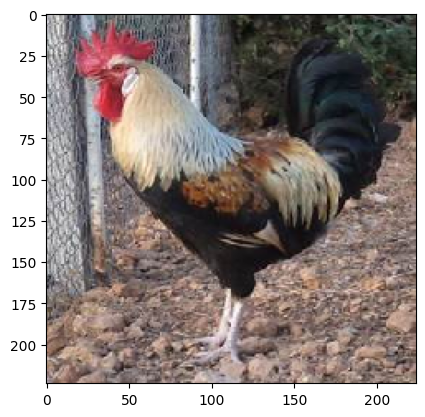

GT chicken
Prediction chicken


In [22]:
i = 567
plt.imshow(path_to_tensor(animal_files_test[i], expand=False)/255.)
plt.show()
print('GT',animal_names_test[i])
img = np.expand_dims(test_tensors[i], axis=0)
print('Prediction',names_unique[np.argmax(model.predict(img))])